In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ['PROJ_LIB'] = r'F:\Program Files\Anaconda\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap

The purpose of creating this mini project is to explore the fundamentals of geographic coordinate and working with Basemap library to plot data on map.

Datasets:
- airlines.csv - data on each airline.

    - country - where the airline is headquartered.
    - active - if the airline is still active.
    - airports.csv - data on each airport.
- name - name of the airport.
    - city - city the airport is located.
    - country - country the airport is located.
    - code - unique airport code.
    - latitude - latitude value.
    - longitude - longitude value.
    - routes.csv - data on each flight route.
- airline - airline for the route.
    - source - starting city for the route.
    - dest - destination city for the route.

There are two questions that should find an answer:
1. For each airport, which destination airport is the most common?
2. Which cities are the most important hubs for airports and airlines?

In [2]:
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
routes = pd.read_csv('routes.csv')

### Creating a new basemap instance

In [3]:
m = Basemap(projection='merc', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)

### Converting the longitude/latitude values from Spherical to cartesian 

In [4]:
longitudes = airports.longitude.tolist()
latitudes = airports.latitude.tolist()
x, y = m(longitudes, latitudes)

### Plotting the coordinates on a map

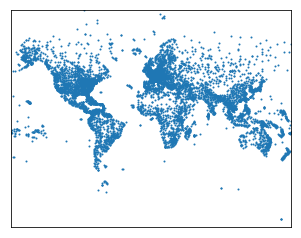

In [5]:
m.scatter(x, y, s=1)
plt.show()

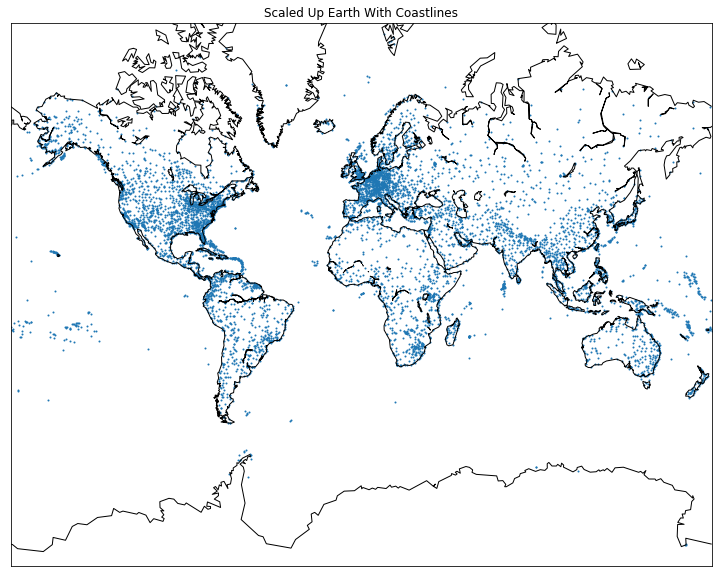

In [6]:
fig, ax = plt.subplots(figsize = (15,10))
m.scatter(x, y, s=1)
m.drawcoastlines()
ax.set_title('Scaled Up Earth With Coastlines')
plt.show()

In [7]:
geo_routes = pd.read_csv('geo_routes.csv')
geo_routes.info()
geo_routes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


### Drawing the routes between 2 points

In [12]:
def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if (abs(end_lat - start_lat) < 180) & (abs(end_lon - start_lon) < 180):
            m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

- Routes from Dallas in Texas

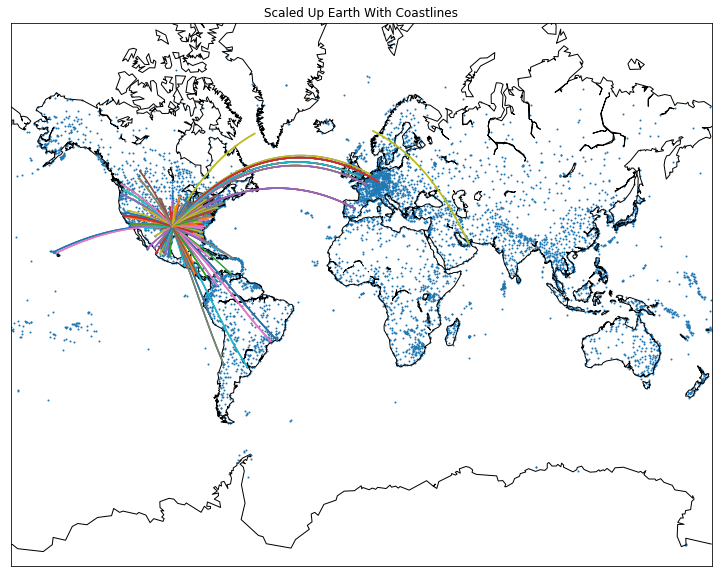

In [13]:
fig, ax = plt.subplots(figsize = (15,10))
m.scatter(x, y, s=1)
m.drawcoastlines()
ax.set_title('Scaled Up Earth With Coastlines')
           
dfw = geo_routes[geo_routes.source == 'DFW']

create_great_circles(dfw)
plt.show()

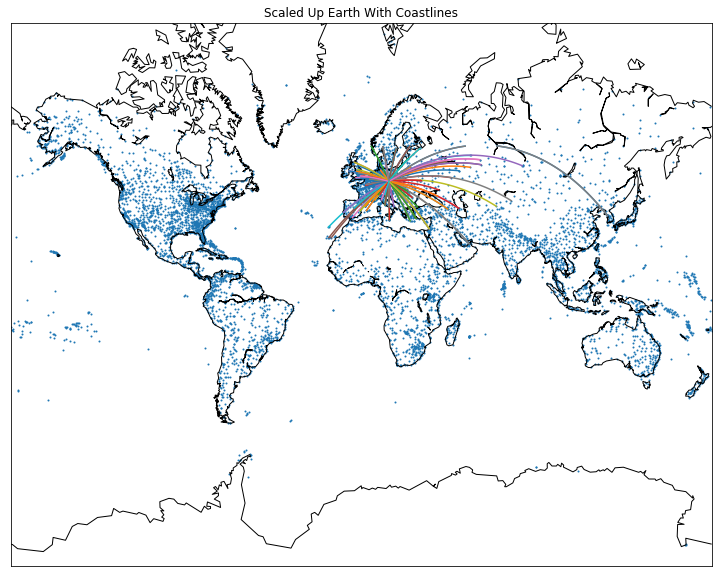

In [9]:
fig, ax = plt.subplots(figsize = (15,10))
m.scatter(x, y, s=1)
m.drawcoastlines()
ax.set_title('Scaled Up Earth With Coastlines')
            
dfw = geo_routes[geo_routes.source == 'PRG']

create_great_circles(dfw)
plt.show()

- Routes from Praque in Chec Republic

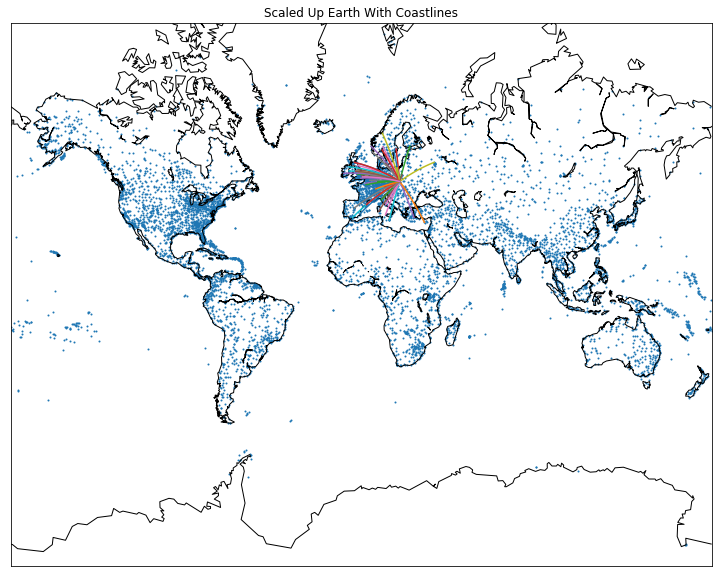

In [10]:
fig, ax = plt.subplots(figsize = (15,10))
m.scatter(x, y, s=1)
m.drawcoastlines()
ax.set_title('Scaled Up Earth With Coastlines')
            
dfw = geo_routes[geo_routes.source == 'KRK']

create_great_circles(dfw)
plt.show()

In [ ]:
- Routes from W in Texas

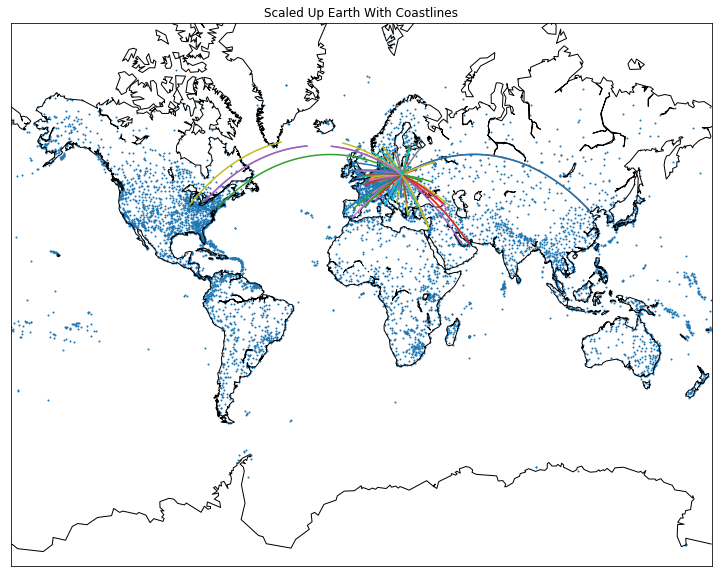

In [11]:
fig, ax = plt.subplots(figsize = (15,10))
m.scatter(x, y, s=1)
m.drawcoastlines()
ax.set_title('Scaled Up Earth With Coastlines')
            
dfw = geo_routes[geo_routes.source == 'WAW']

create_great_circles(dfw)
plt.show()